In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variable_names = [
    "tiene_mascota",
    "cantidad_mascotas",
    "tipo_mascota",
    "edad_gato",
    "raza_gato",
    "tamano_gato",
    "edad_perro",
    "raza_perro",
    "tamano_perro",
    "compra_juguete",
    "compra_juguete_ultimo_anio",
    "frecuencia_compra_juguetes",
    "tiempo_jugando_diario",
    "interactua_con_mascota",
    "tipo_juguetes_compra",
    "juguetes_favoritos",
    "mala_experiencia",
    "criterio_compra_juguetes",
    "factores_evaluar_calidad_juguetes",
    "factor_importante",
    "dispuesto_pagar_mejor_calidad",
    "calidad_media_juguetes",
    "diferencia_comportamiento",
    "precio_max_juguete",
    "forma_compra",
    "marca_preferida",
    "marca_preferida_nombre",
    "edad_encuestado",
    "unidad_familiar",
    "genero",
    "ocupacion_encuestado"
]

In [2]:
df = pd.read_csv('respuestas.csv')
df = df.drop('Marca temporal', axis=1) # Eliminar columna de marca temporal
df = df.drop('Puntuación', axis=1) # Eliminar columna de puntuación
df = df.rename(columns=dict(zip(df.columns, variable_names))) # Renombrar columnas
df.drop(df[df['tiene_mascota'] == 'No'].index, inplace=True) # Eliminar filas de personas que no tienen mascota

In [3]:
df['tipo_mascota'] = df['tipo_mascota'].map({'Perro': 0, 'Gato': 1}) # Convertir tipo de mascota a binario
df['compra_juguete'] = df['compra_juguete'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete a binario
df['compra_juguete_ultimo_anio'] = df['compra_juguete_ultimo_anio'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete en el último año a binario
df['interactua_con_mascota'] = df['interactua_con_mascota'].map({'Sí': 1, 'No': 0}) # Convertir interacción con mascota a binario
df['mala_experiencia'] = df['mala_experiencia'].map({'Sí': 1, 'No': 0}) # Convertir mala experiencia a binario
df['diferencia_comportamiento'] = df['diferencia_comportamiento'].map({'Sí': 1, 'No': 0}) # Convertir diferencia de comportamiento a binario
df['marca_preferida'] = df['marca_preferida'].map({'Sí': 1, 'No': 0}) # Convertir marca preferida a binario
df['genero'] = df['genero'].map({'Masculino': 'Masculino', 'Femenino': 'Femenino'}) # Convertir género a binario
df['precio_max_juguete'] = df['precio_max_juguete'].map({'0-10€': 0, '11-20€': 1, '21-30€': 2, '31€ o más': 3}) # Convertir precio máximo de juguete a binario

C:\Users\34644\AppData\Local\Temp\ipykernel_9144\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

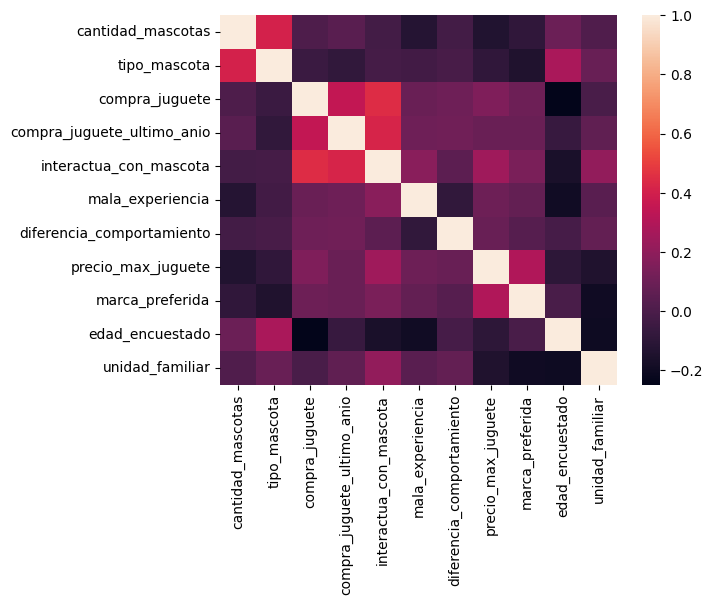

In [4]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='edad_encuestado', ylabel='Count'>

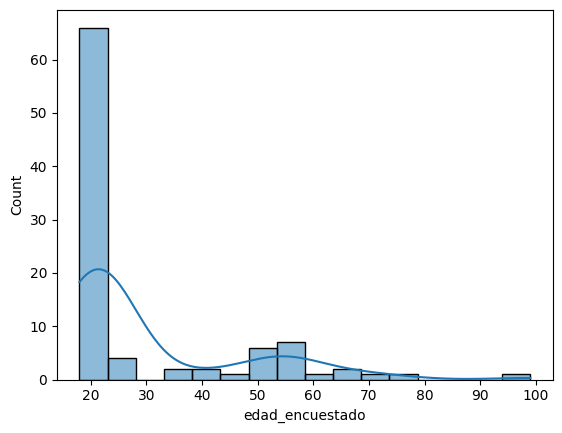

In [5]:
sns.histplot(df, x="edad_encuestado",kde=True)

<AxesSubplot: >

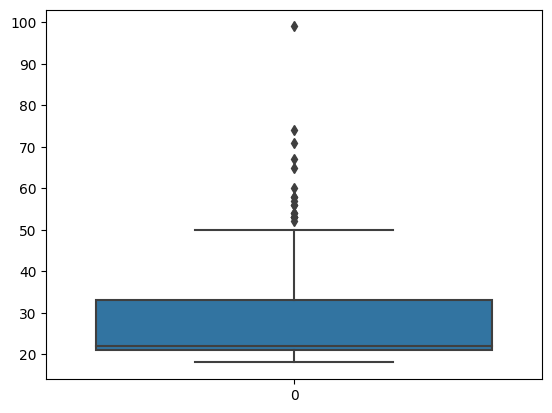

In [6]:
sns.boxplot(data=df['edad_encuestado'])

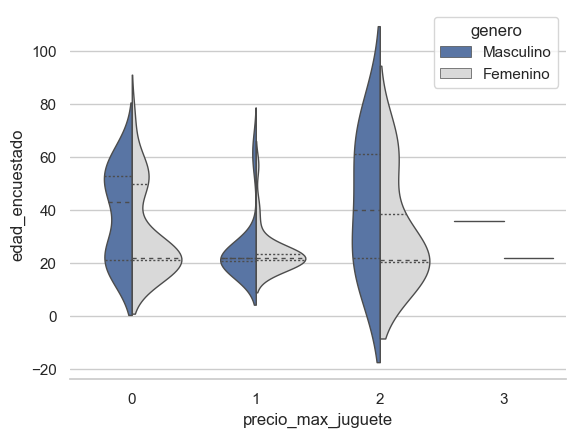

In [7]:
sns.set_theme(style="whitegrid")
sns.violinplot(
    data=df,
    x='precio_max_juguete',
    y='edad_encuestado',
    hue='genero',
    split=True,
    inner="quart",
    linewidth=1,
    palette={"Masculino": "b", "Femenino": ".85"},
)
sns.despine(left=True)

<AxesSubplot: xlabel='precio_max_juguete', ylabel='Count'>

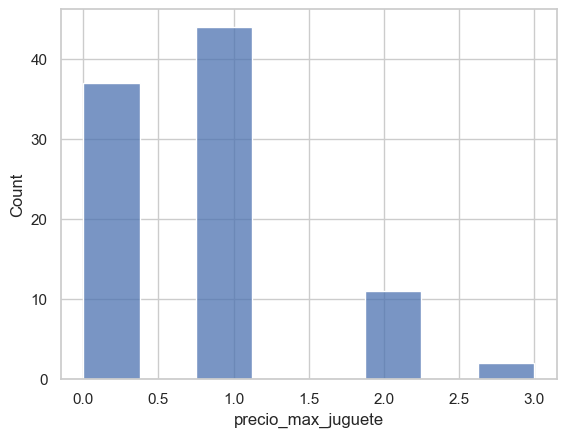

In [8]:
sns.histplot(
    data=df,
    x="precio_max_juguete"
)

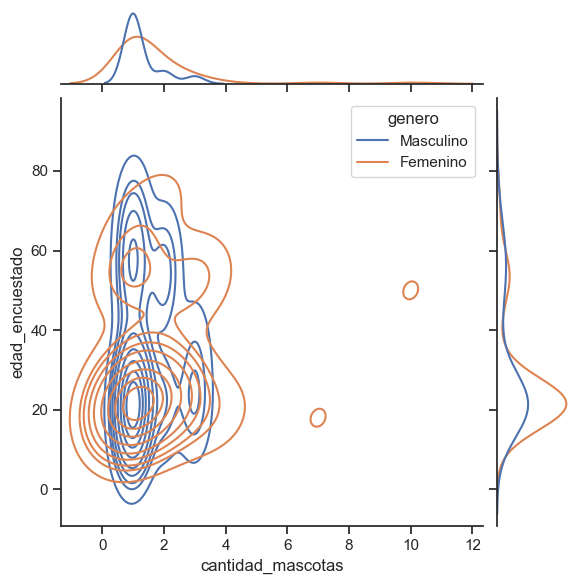

In [9]:
sns.set_theme(style="ticks")
sns.jointplot(data=df,
              x='cantidad_mascotas',
              y='edad_encuestado',
              hue='genero',
              kind='kde'
)

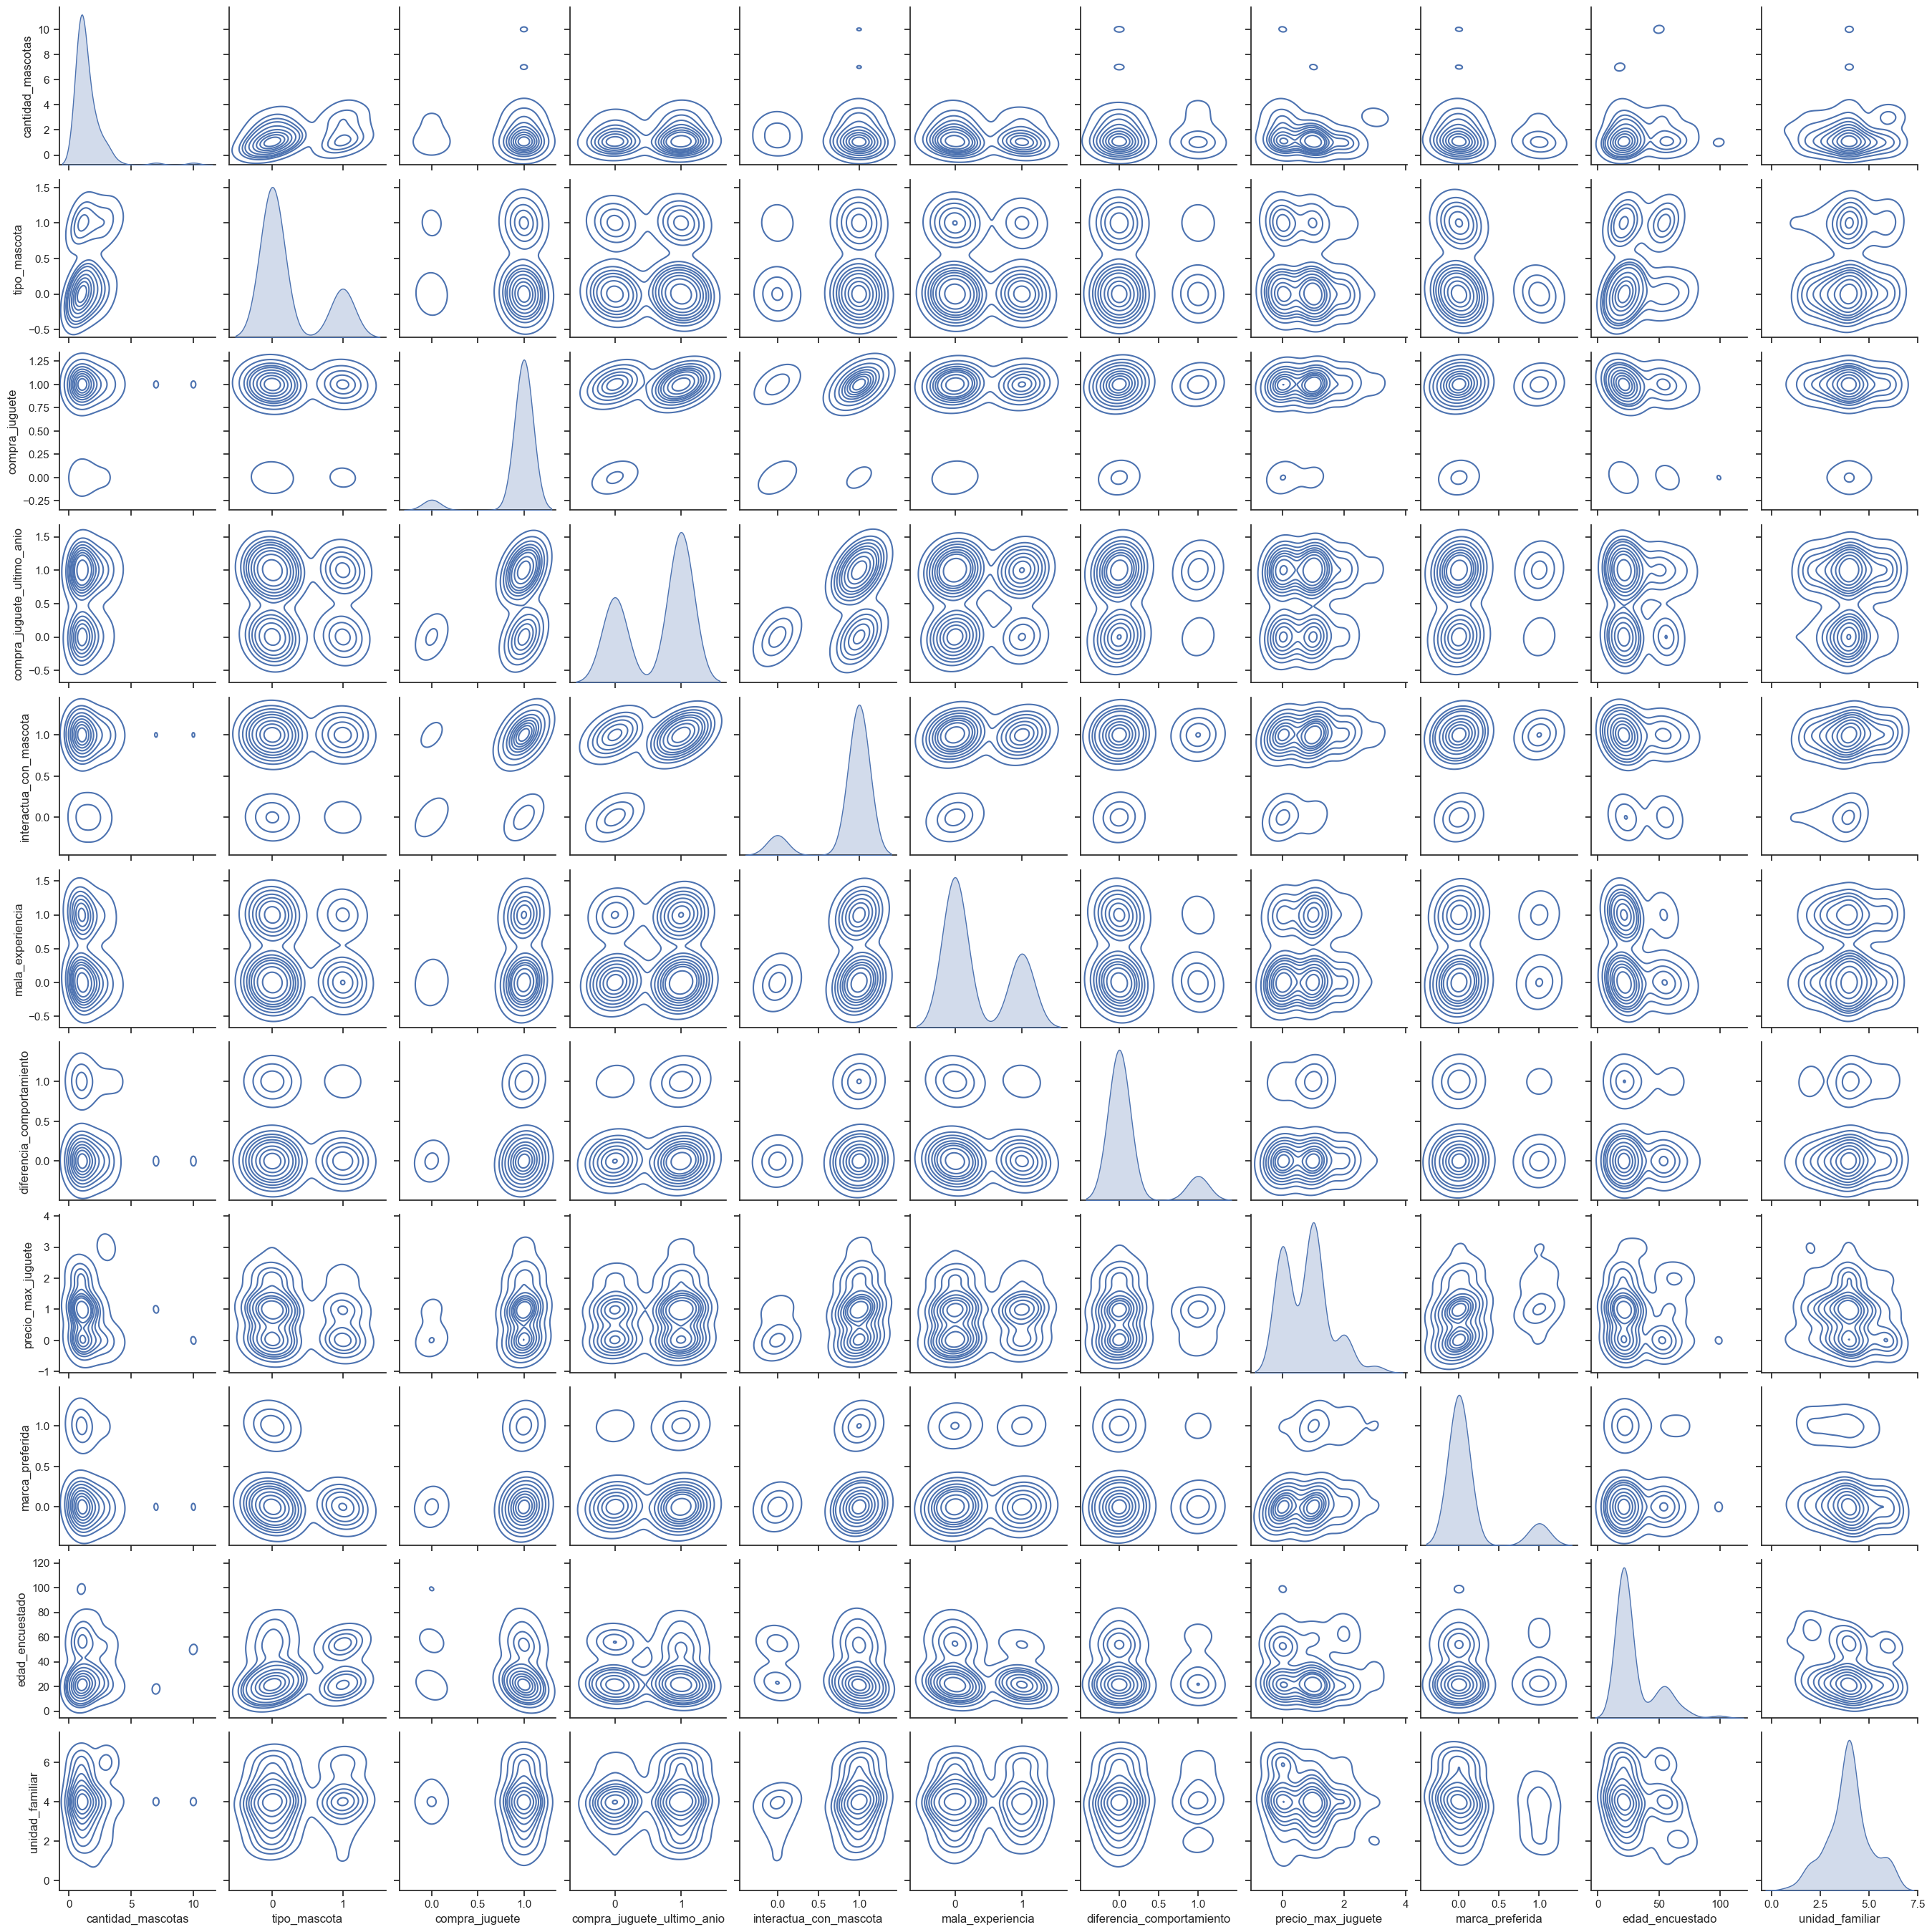

In [10]:
sns.pairplot(df, kind='kde')

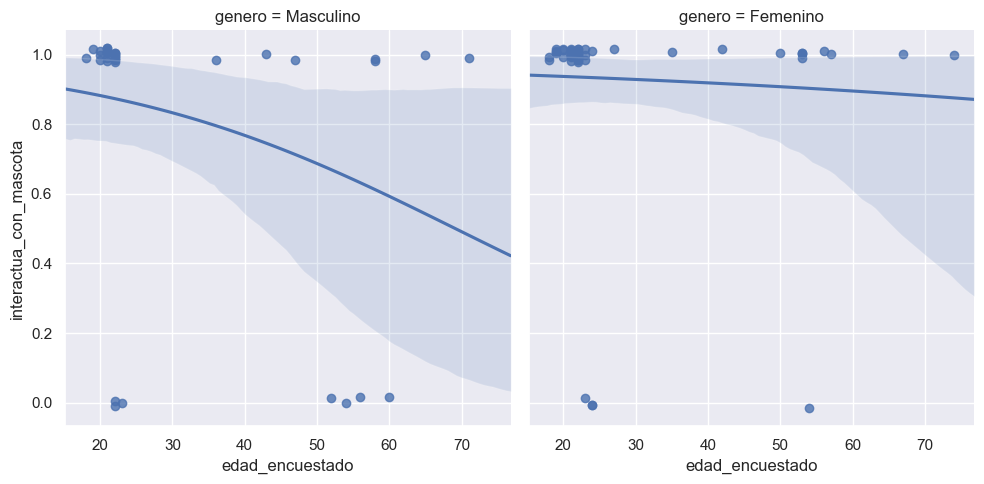

In [11]:
sns.set_theme(style="darkgrid")
sns.lmplot(
    data=df,
    x='edad_encuestado',
    y='interactua_con_mascota',
    
    col='genero',
    palette=dict(male="#6495ED", female="#F08080"),
    y_jitter=.02,
    logistic=True,
    truncate=False
)

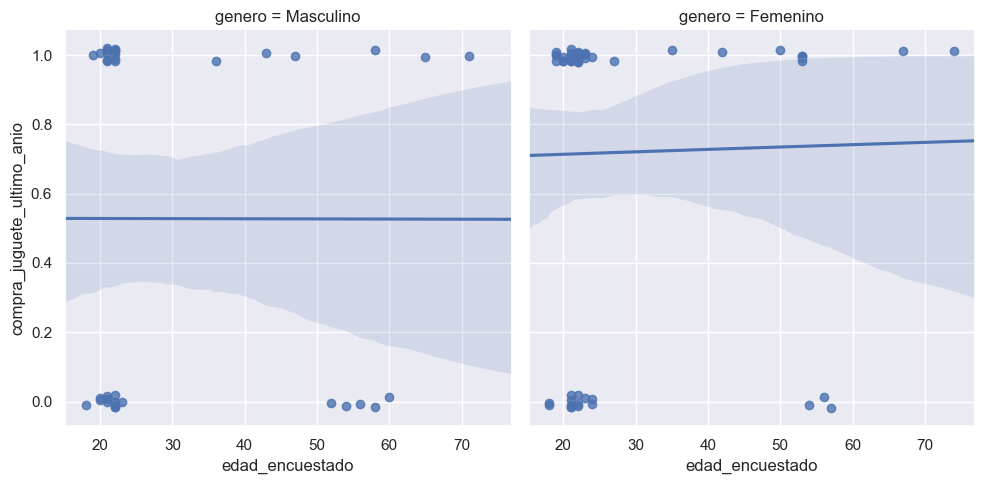

In [12]:

sns.lmplot(
    data=df,
    x='edad_encuestado',
    y='compra_juguete_ultimo_anio',
    col='genero',
    palette=dict(male="#6495ED", female="#F08080"),
    y_jitter=.02,
    logistic=True,
    truncate=False
)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Seguridad'),
  Text(1, 0, 'Diversión/entretenimiento'),
  Text(2, 0, 'Durabilidad'),
  Text(3, 0, 'Precio'),
  Text(4, 0, 'Interactividad'),
  Text(5, 0, 'Tamaño'),
  Text(6, 0, 'No')])

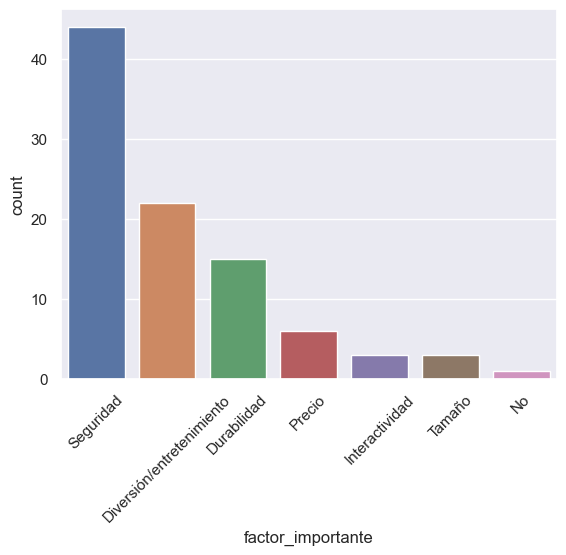

In [13]:
sns.countplot(data=df, x='factor_importante',order=df['factor_importante'].value_counts().index)
#rotate x-axis' text to 45 degrees
plt.xticks(rotation=45)

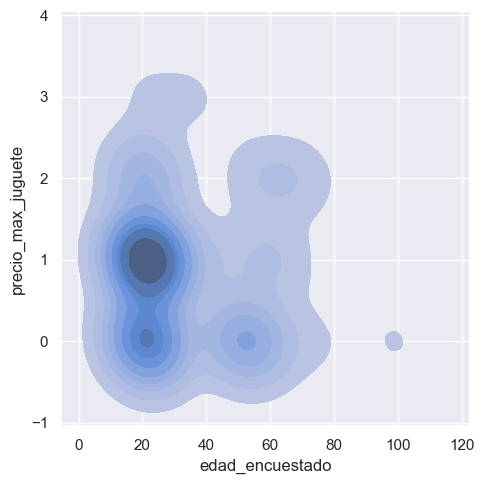

In [14]:
sns.displot(
    data=df,
    x="edad_encuestado",
    y="precio_max_juguete",
    kind='kde',
    fill=True
)

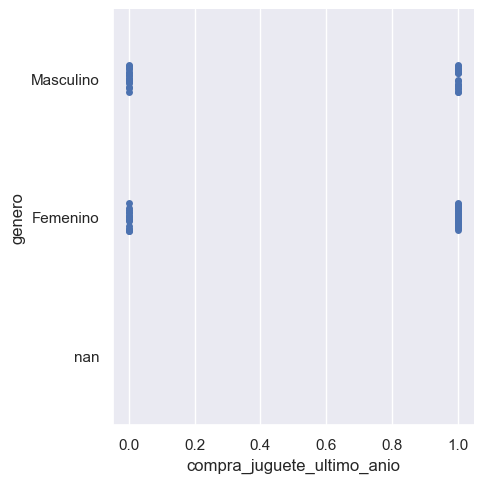

In [21]:
sns.catplot(
    data=df,
    x='compra_juguete_ultimo_anio',
    y='genero',
    kind='bar'
    
)